# 3. Bank_Churnrate_EDA<a id='2_Data_wrangling'></a>

## 3.1 Table of Contents<a id='2.1_Contents'></a>
* 3. Bank_Churnrate_EDA
  * 3.1 Table of Contents
  * 3.2 Introduction
  * 3.3 Imports
  * 3.4 Load Bank Churn Cleaned Data
  * 3.5 Explore The Data
    * 3.5.1 Number & Handling Of Missing Values 
    * 3.5.2 Determing Correlation of Features with Target Feature ("Attrition_Flag")
      * 3.5.2.1 Determine User Base Churn vs. Not Churned
      * 3.5.2.2 One-Hot Encoding & Correlation with Categorical Features
  * 3.6 Save Data
  * 3.7 Summary


## 3.2 Introduction

Further Analysis will be conducted with the Bank Data Cleaned dataset to glean any further insights regarding correlation with the determined feature value of "Attrition_Flag" column along with determining any noteworthy relationships regarding churned vs. not churned people groups.

## 3.3 Imports<a id='2.3_Imports'></a>

Importing all appropriate packages in order to perform further EDA for the previously "cleaned" dataset.

In [29]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## 3.4 Load Bank Churn Cleaned Data

In [30]:
#Dropped first column since it was unnamed and repeat of train_idx
#Code to remove the first column for the dataset: https://www.statology.org/drop-unnamed-column-pandas/
bank_clean_df = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_data_train_clean.csv', index_col=0)

Auditing the dataset with .info() and .head() displaying the first few records.

In [31]:
#info method on bank_clean_df to see a summary of the data
bank_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   train_idx                 8101 non-null   int64  
 1   CLIENTNUM                 8101 non-null   int64  
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   object 
 4   Dependent_count           8101 non-null   int64  
 5   Education_Level           6896 non-null   object 
 6   Marital_Status            7522 non-null   object 
 7   Income_Category           7212 non-null   object 
 8   Card_Category             8101 non-null   object 
 9   Months_on_book            8101 non-null   int64  
 10  Total_Relationship_Count  8101 non-null   int64  
 11  Months_Inactive_12_mon    8101 non-null   int64  
 12  Contacts_Count_12_mon     8101 non-null   int64  
 13  Credit_Limit              8101 non-null   float64
 14  Total_Re

In [32]:
#head method on bank_clean_df to print the first several rows of the data
bank_clean_df.head()

,train_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,713071383,54,F,1,NaN,Single,NaN,Blue,36,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,1,714246333,58,F,4,High School,Married,NaN,Blue,48,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,2,718206783,45,F,4,NaN,Single,Less than $40K,Gold,36,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [33]:
bank_clean_df.shape

(8101, 22)

## 3.5 Explore The Data

### 3.5.1 Number & Handling Of Missing Values 

Count the number of missing values in each column and sort them.

In [34]:
#The statement below came from the ski_data project but is used here as well to calculate number and percent
#of missing values in the dataset.

missing = pd.concat([bank_clean_df.isnull().sum(), 100 * bank_clean_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
Education_Level,1205,14.874707
Income_Category,889,10.973954
Marital_Status,579,7.147266
train_idx,0,0.000000
Credit_Limit,0,0.000000
Avg_Utilization_Ratio,0,0.000000
Total_Ct_Chng_Q4_Q1,0,0.000000
Total_Trans_Ct,0,0.000000
Total_Trans_Amt,0,0.000000
Total_Amt_Chng_Q4_Q1,0,0.000000


Looking at the dataset: Education Level, Income Category, and Maritial status have null records with about 15% null in Education Level.

Since the above columns have NaN values within its columns, a new category will be created labeled as 'missing' within each of these columns. Also a new dataset will be created where the missing values are dropped and a comparision will be done between the two datasets.

In [35]:
#Dropped columns 'train_idx' and 'CLIENTNUM' since these features seem to be labels for each data point.
bank_clean_na_kept = bank_clean_df.drop(['train_idx' , 'CLIENTNUM'], axis=1)
bank_clean_na_kept['Education_Level'] = bank_clean_na_kept['Education_Level'].replace(np.nan, 'missing')
bank_clean_na_kept['Income_Category'] = bank_clean_na_kept['Income_Category'].replace(np.nan, 'missing')
bank_clean_na_kept['Marital_Status'] = bank_clean_na_kept['Marital_Status'].replace(np.nan , 'missing')
bank_clean_na_kept.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,54,F,1,missing,Single,missing,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,58,F,4,High School,Married,missing,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,45,F,4,missing,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [43]:
#Dropped 'NA' values within mentioned categorical columns and dropped columns 'train_idx' and 'CLIENTNUM' since these features seem to be labels for each data point.
bank_clean_dropna = bank_clean_df.dropna()
bank_clean_dropna = bank_clean_dropna.drop(['train_idx' , 'CLIENTNUM'], axis=1)
bank_clean_dropna.shape

(5690, 20)

In [41]:
print(f"Percent of data still left after dropping NA values: {round(100 * len(bank_clean_dropna)/len(bank_clean_df), 2)}%")

Percent of data still left after dropping NA values: 70.24%


### 3.5.2 Determing Correlation of Features with Target Feature ("Attrition_Flag")

Displaying a correlation heatmap with just the numeric features of the dataset to describe relationships of features within the dataset according to the Attrition Flag column which describes which customers have churned or not churned from the dataset.

C:\Users\tpooz\AppData\Local\Temp\ipykernel_33380\706278533.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bank_clean_dropna.corr()


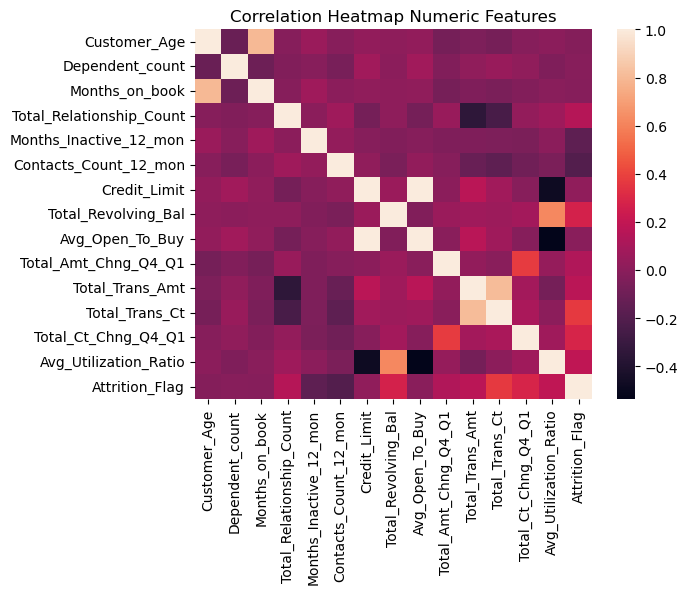

In [44]:
corr = bank_clean_dropna.corr()
sns.heatmap(corr)
plt.title('Correlation Heatmap Numeric Features')
plt.show()

In [45]:
corr['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag              1.000000
Total_Trans_Ct              0.364835
Total_Ct_Chng_Q4_Q1         0.281174
Total_Revolving_Bal         0.268979
Avg_Utilization_Ratio       0.185690
Total_Trans_Amt             0.170178
Total_Relationship_Count    0.149125
Total_Amt_Chng_Q4_Q1        0.133285
Credit_Limit                0.017750
Avg_Open_To_Buy            -0.006245
Dependent_count            -0.008122
Months_on_book             -0.018599
Customer_Age               -0.024498
Months_Inactive_12_mon     -0.160701
Contacts_Count_12_mon      -0.203447
Name: Attrition_Flag, dtype: float64

It seems viewing just the numeric data for the dataset, that Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, and Total_Amt_Chng_Q4_Q1 all have moderate positive correlation with Attrition Flag column; whereas Contacts_Count_12_mon and Months_Inactive_12_mon have some moderate negative correlation. 

#### 3.5.2.1 Determine User Base Churn vs. Not Churned

It might be helpful as well to understand the userbase of customers who churned vs. not churned in the dataset as well as to get a count to determine the level of imbalance in the dataset for future steps in developing a predictive model. In this case, both datasets between the dataset where the categorical features with 'NA' values were dropped vs. dataset where the categorical features with 'NA' values were replaced with 'missing', are compared by their corresponding distributions.

In [47]:
#Retrieive data for customers who did not churn
bank_current_drop = bank_clean_dropna[bank_clean_dropna['Attrition_Flag'] == 1]
bank_current = bank_clean_na_kept[bank_clean_na_kept['Attrition_Flag'] == 1]
print(f"Number of customers not churned in dropped NA dataset: {len(bank_current_drop)}")
print(f"Number of customers not churned in 'missing' NA dataset: {len(bank_current)}")

Number of customers not churned in dropped NA dataset: 4800
Number of customers not churned in 'missing' NA dataset: 6801


In [48]:
#Retrieve data for customers who churned
bank_churn_drop = bank_clean_dropna[bank_clean_dropna['Attrition_Flag'] == 0]
bank_churn = bank_clean_na_kept[bank_clean_na_kept['Attrition_Flag'] == 0]
print(f"Number of customers not churned in dropped NA dataset: {len(bank_churn_drop)}")
print(f"Number of customers not churned in 'missing' NA dataset: {len(bank_churn)}")

Number of customers not churned in dropped NA dataset: 890
Number of customers not churned in 'missing' NA dataset: 1300


In [53]:
print(f"Total Percent for customers who have churned based on dropped NA dataset: {round(100 * len(bank_churn_drop)/len(bank_clean_dropna),2)}%")
print(f"Total Percent for customers who have churned based on 'missing' valued dataset: {round(100 * len(bank_churn)/len(bank_clean_na_kept),2)}%")

Total Percent for customers who have churned based on dropped NA dataset: 15.64%
Total Percent for customers who have churned based on 'missing' valued dataset: 16.05%


Now given the two datsets for customers churned vs. not churned, we can plot histograms for the distributions to determine the userbase for each groups regarding the categorical variable and between the 'missing' vs. dropped 'NA' datasets.

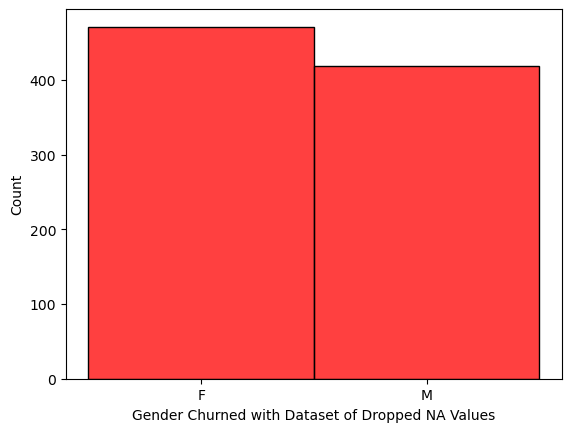

In [63]:
#Identifying color for plot code found on: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=bank_churn_drop, x='Gender', color= 'r')
plt.xlabel("Gender Churned with Dataset of Dropped NA Values")
plt.show()

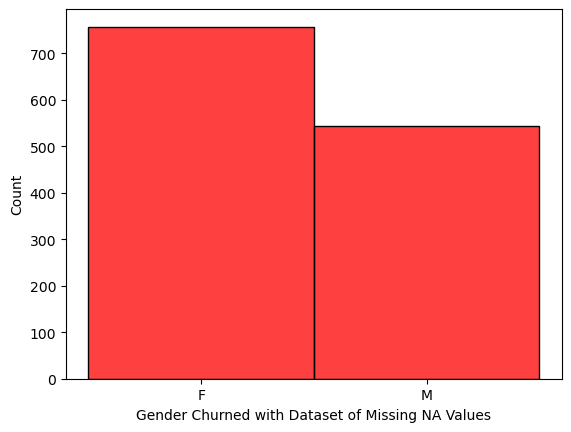

In [64]:
sns.histplot(data=bank_churn, x='Gender', color = 'r')
plt.xlabel("Gender Churned with Dataset of 'Missing' NA Values")
plt.show()

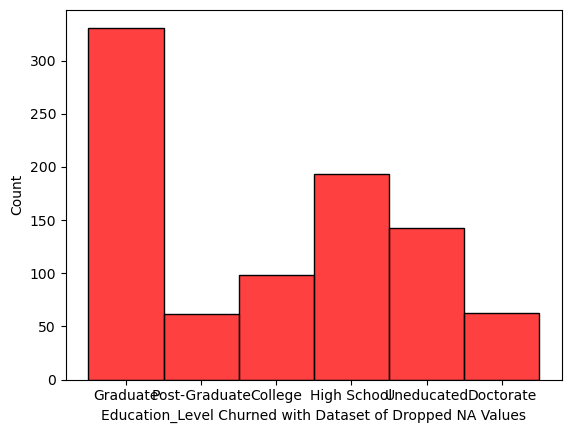

In [65]:
sns.histplot(data=bank_churn_drop, x='Education_Level', color= 'r')
plt.xlabel("Education_Level Churned with Dataset of Dropped NA Values")
plt.show()

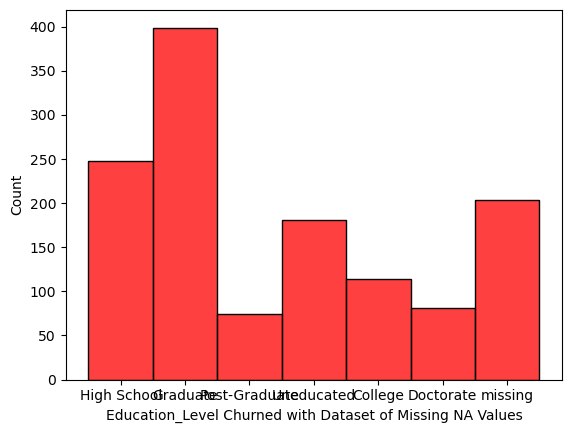

In [66]:
sns.histplot(data=bank_churn, x='Education_Level', color = 'r')
plt.xlabel("Education_Level Churned with Dataset of 'Missing' NA Values")
plt.show()

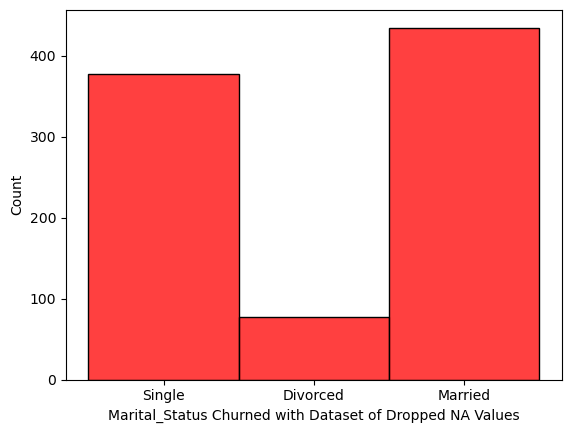

In [67]:
sns.histplot(data=bank_churn_drop, x='Marital_Status', color= 'r')
plt.xlabel("Marital_Status Churned with Dataset of Dropped NA Values")
plt.show()

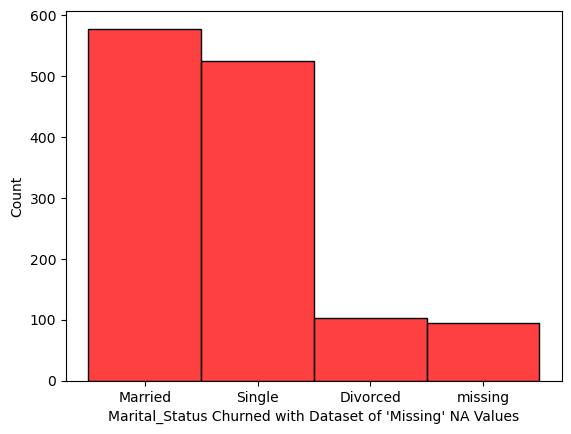

In [77]:
sns.histplot(data=bank_churn, x='Marital_Status', color= 'r')
plt.xlabel("Marital_Status Churned with Dataset of 'Missing' NA Values")
plt.show()

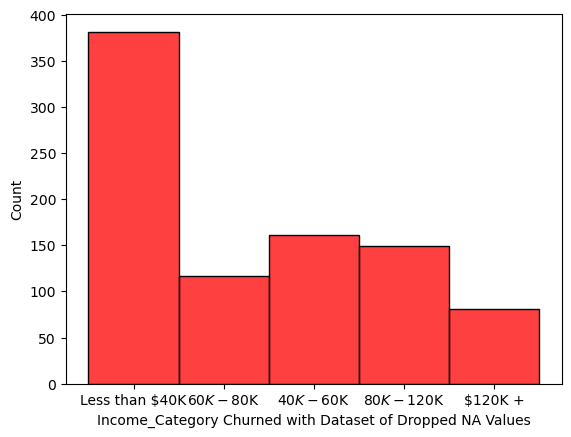

In [78]:
sns.histplot(data=bank_churn_drop, x='Income_Category', color= 'r')
plt.xlabel("Income_Category Churned with Dataset of Dropped NA Values")
plt.show()

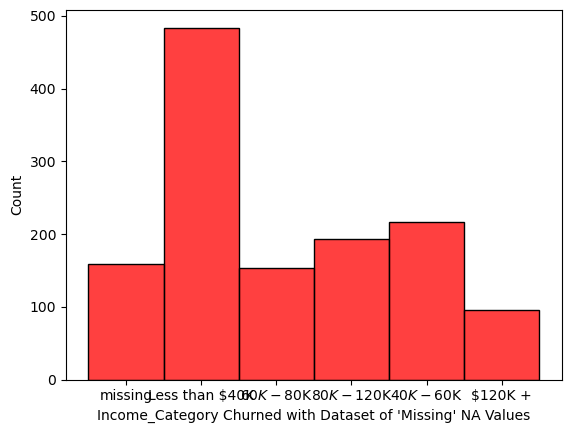

In [79]:
sns.histplot(data=bank_churn, x='Income_Category', color= 'r')
plt.xlabel("Income_Category Churned with Dataset of 'Missing' NA Values")
plt.show()

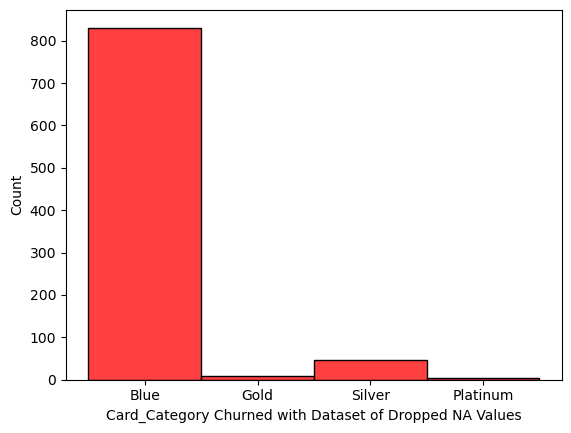

In [80]:
sns.histplot(data=bank_churn_drop, x='Card_Category', color= 'r')
plt.xlabel("Card_Category Churned with Dataset of Dropped NA Values")
plt.show()

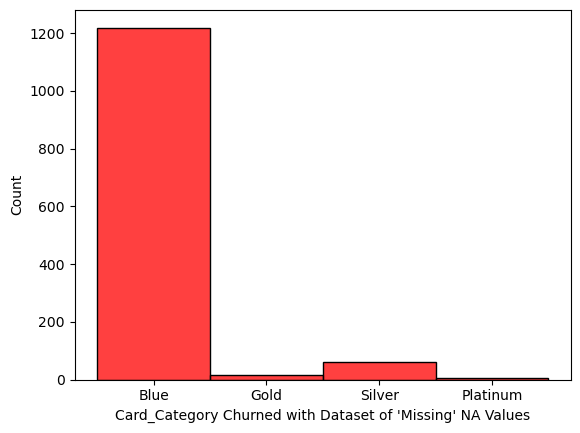

In [81]:
sns.histplot(data=bank_churn, x='Card_Category', color= 'r')
plt.xlabel("Card_Category Churned with Dataset of 'Missing' NA Values")
plt.show()

Based upon this churned dataset assessment, it seems that the more common users from the churned sample are previous female users, graduate users, users who are either married or single, users making less than 40k, and users who are in the more common Blue category card holders. Also it seems that comparing the distribution between genders for datasets with dropped values vs. missing, that more females tended to have missing values in the data than males. There are also good portion of the data from the Education_Level column is labeled as missing from the dataset. However, from an intial glance of the distributions, it seems that perhaps marketing or applying strategies to accomodate users who are making annually less thank 40k might mitigate churn. 

Created the same above histplots for dataset of customers "not churned":

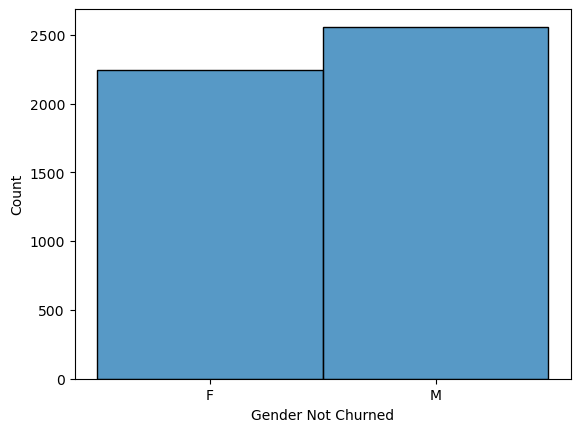

In [88]:
sns.histplot(data=bank_current, x='Gender')
plt.xlabel("Gender Not Churned")
plt.show()

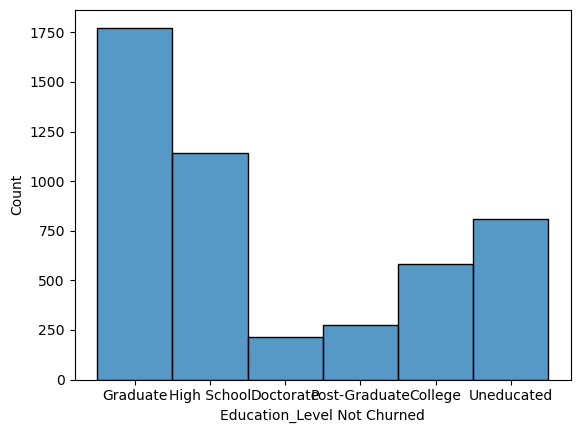

In [89]:
sns.histplot(data=bank_current , x='Education_Level')
plt.xlabel("Education_Level Not Churned")
plt.show()

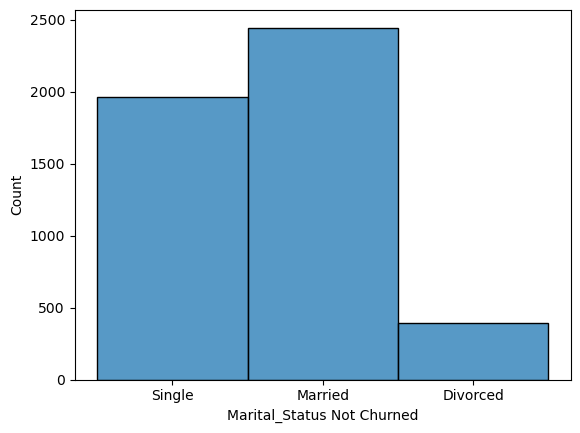

In [90]:
sns.histplot(data=bank_current , x='Marital_Status')
plt.xlabel("Marital_Status Not Churned")
plt.show()

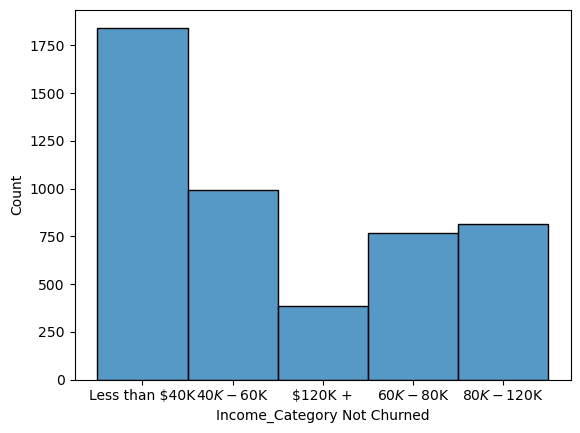

In [91]:
sns.histplot(data=bank_current , x='Income_Category')
plt.xlabel("Income_Category Not Churned")
plt.show()

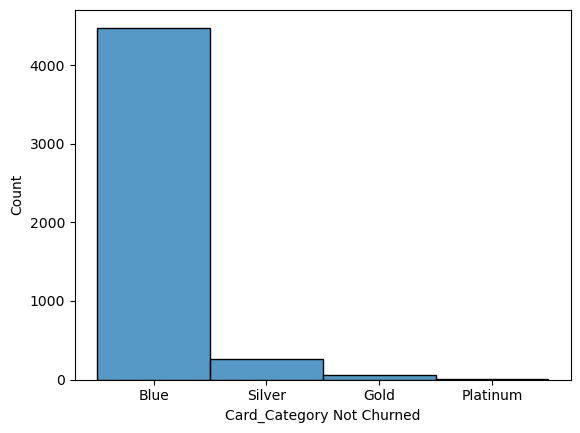

In [92]:
sns.histplot(data=bank_current , x='Card_Category')
plt.xlabel("Card_Category Not Churned")
plt.show()

Viewing the analysis of samples for users who are current or who have not churned, it seems more current users are male, who are graduates, married, who are also in a lower income bracket of less than 40k, and blue or common card holders. Therefore, further analysis will be needed to truly assess what are the correlated features to the target of Attrition Flag. However, this might be due to when in dropping the missing values, missing the subset of population of the dataset who had data but missed filling in different rows. 

Therefore, the above analysis gives a general sense of the data at hand, but will need to be careful in terms of assessing the overall population.

#### 3.5.2.2 One-Hot Encoding & Correlation with Categorical Features

Modified the categorical variables with one-hot encoding in order to create numeric values to be used in future modeling as well as creating a correlation object in order to see if categorical variables as well are in any correlation with the Attrition_Flag target feature values.

In [93]:
#Apply pd.get_dummies() for one-hot encoding for cateogorical feature values
bank_clean_numeric = pd.get_dummies(bank_clean_dropna)
bank_clean_numeric.head()

,train_idx,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
3,3,721096983,34,2,36,4,3,4,3625.0,2517,...,1,0,0,0,0,1,1,0,0,0
4,4,720028683,49,2,39,5,3,4,2720.0,1926,...,0,0,1,0,0,0,1,0,0,0
5,5,778942233,60,0,45,5,2,4,1438.3,648,...,0,0,0,0,0,1,1,0,0,0
8,8,719952408,30,0,36,3,3,2,2550.0,1623,...,0,0,0,0,0,1,1,0,0,0
9,9,708412758,33,3,36,5,2,3,1457.0,0,...,1,0,0,0,0,1,1,0,0,0


In [94]:
#Further "cleaning" for the dataset to be done, in order to remove seemingly unrelated columns affecting "Attrition_Flag" column
#Namely dropping train_idx since this is an index for training set, and CLIENTNUM since this is just assorted numbers describing the specific users
#Code to drop named columns: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/#
numeric_dropped = bank_clean_numeric.drop(['train_idx' , 'CLIENTNUM'], axis=1)

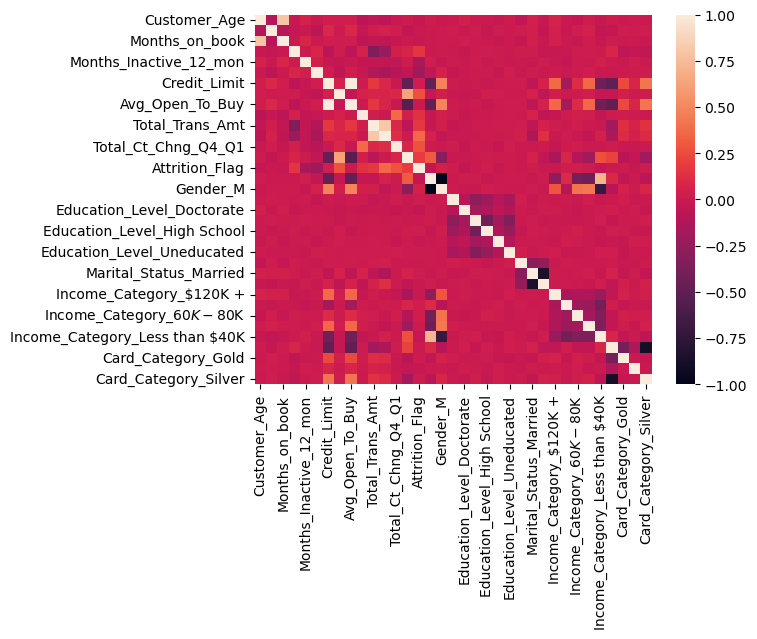

In [95]:
#Create correlation object for all numeric dataframe from bank_clean_data set in order to assess correlations with Attrition Flag.
corr_numeric = numeric_dropped.corr()
sns.heatmap(corr_numeric)
plt.show()

In [79]:
corr_numeric['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag                    1.000000
Total_Trans_Ct                    0.364835
Total_Ct_Chng_Q4_Q1               0.281174
Total_Revolving_Bal               0.268979
Avg_Utilization_Ratio             0.185690
Total_Trans_Amt                   0.170178
Total_Relationship_Count          0.149125
Total_Amt_Chng_Q4_Q1              0.133285
Gender_M                          0.045186
Income_Category_$60K - $80K       0.028017
Income_Category_$40K - $60K       0.023828
Education_Level_High School       0.018403
Credit_Limit                      0.017750
Marital_Status_Married            0.015278
Education_Level_College           0.012472
Education_Level_Uneducated        0.007257
Card_Category_Gold                0.003949
Card_Category_Silver              0.003173
Income_Category_$80K - $120K      0.001899
Card_Category_Blue               -0.001150
Education_Level_Graduate         -0.001751
Avg_Open_To_Buy                  -0.006245
Marital_Status_Divorced          -0.006688
Dependent_c

It seems looking at the above list, that the moderate positive correlations come from feature values in the Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, and Total_Amt_Chng_Q4_Q1 columns. There is an intuitive sense to this, as the customers spending pattern would seem to affect if the customer is in fact more likely to churn or not. However, what also seems of interest is that how many dependents the customer had also affect some of the variance with the Attrition_Flag column. 

The moderate negative correlations comes from Contacts_Count_12_mon and Months_Inactive_12_mon which again intuitively can see that based on the customer spending or use pattern, seems to affect the overall "Attrition_Flag."

## 3.6 Save data

In [80]:
numeric_dropped.shape

(5690, 35)

In [75]:
# save the data to a new csv file
datapath = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets'
numeric_dropped.to_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_data_train_preprocessed.csv')  

## 3.7 Summary

After a further analysis and "cleaning" of the dataset from dropping NA columns and transforming non-numeric columns to numeric, feature values that have a moderate positive correlation with the target Attrition_Flag column are namely Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, and Total_Amt_Chng_Q4_Q1 columns. And feature values with moderate negative correlation with Attrition_Flag column are namely Contacts_Count_12_mon and Months_Inactive_12_mon. Again there seems to be an intuitive sense to this, as based on the customers pattern of use, seems to correlate with whether or not the customer will attrite. Howevever, it seems that how many dependents a customer had or their relationship count, also had some affect on the variance for the Attrition_Flag column. These features will be kept in mind when in development of future steps for an appropraite predictive model. 

Viewing the dataset and target variable, this will be a classification learning problem so different classification models (Logistic Regression, Random Forest, Gradeint Booosting, etc.) will be cross-validated and assessed to determine an appropriate model for prediction.